In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [239]:
df=pd.read_csv("mushrooms.csv")
df.shape


(8124, 23)

In [240]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [241]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [242]:
df.duplicated().sum()

np.int64(0)

C:\Users\NANDHANAA M\AppData\Local\Temp\ipykernel_6944\2276249696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set1')


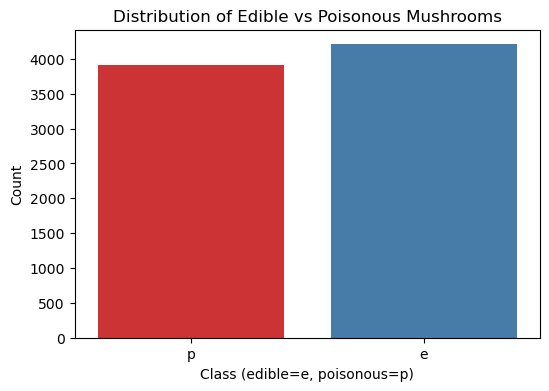

In [243]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='Set1')
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.xlabel("Class (edible=e, poisonous=p)")
plt.ylabel("Count")
plt.show()

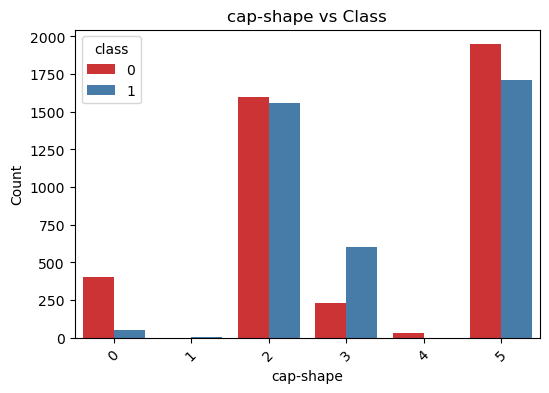

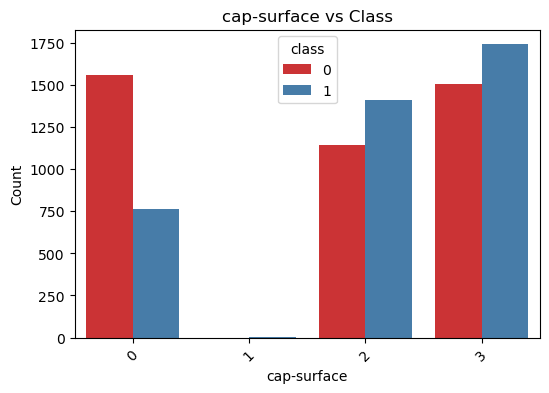

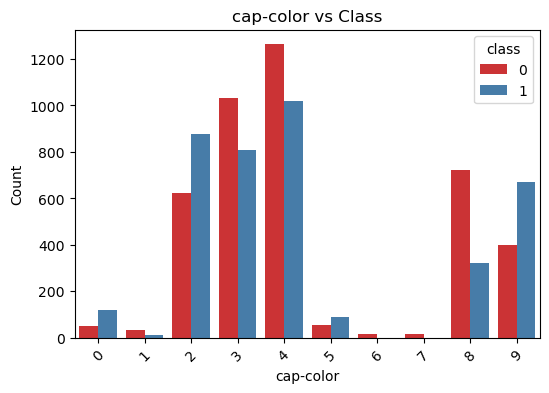

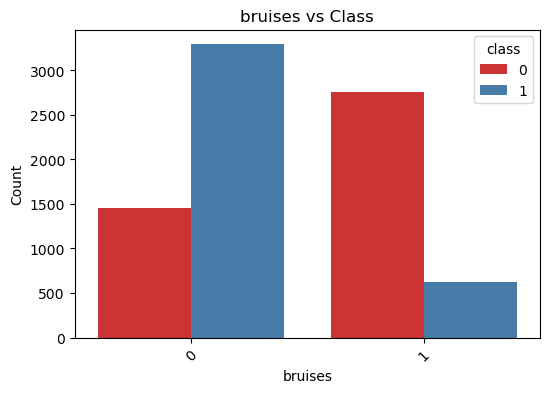

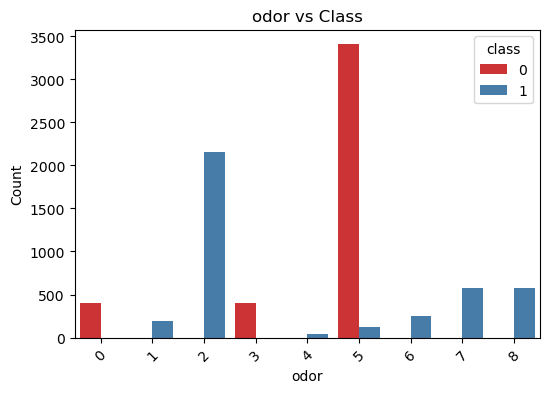

In [247]:
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='class', data=df, palette='Set1')
    plt.title(f"{col} vs Class")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = df.apply(LabelEncoder().fit_transform)

X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(" Training Performance:")
print(f"Accuracy  : {train_accuracy:.4f}")
print(f"Precision : {train_precision:.4f}")
print(f"Recall    : {train_recall:.4f}")
print(f"F1-Score  : {train_f1:.4f}\n")


test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(" Testing Performance:")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"F1-Score  : {test_f1:.4f}\n")

print("Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred, target_names=["edible (0)", "poisonous (1)"]))


 Training Performance:
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000

 Testing Performance:
Accuracy  : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-Score  : 1.0000

Classification Report (Test Set):

               precision    recall  f1-score   support

   edible (0)       1.00      1.00      1.00      1257
poisonous (1)       1.00      1.00      1.00      1181

     accuracy                           1.00      2438
    macro avg       1.00      1.00      1.00      2438
 weighted avg       1.00      1.00      1.00      2438



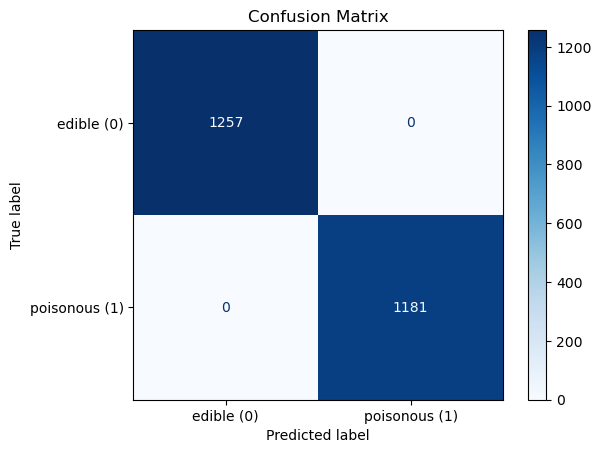

In [245]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["edible (0)", "poisonous (1)"])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title("Confusion Matrix")
plt.show()

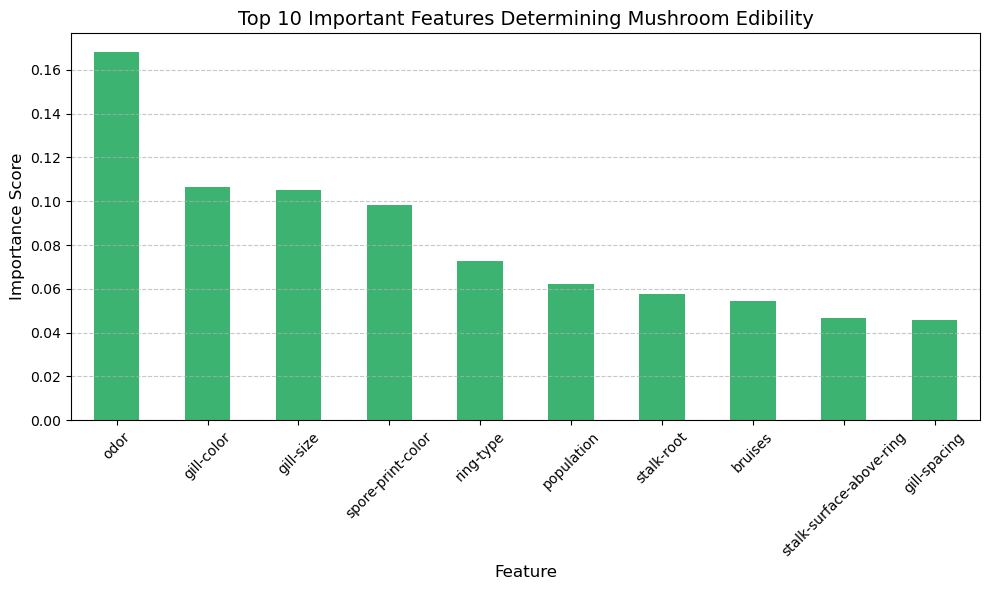

odor                        0.168299
gill-color                  0.106712
gill-size                   0.105013
spore-print-color           0.098407
ring-type                   0.072513
population                  0.062141
stalk-root                  0.057691
bruises                     0.054524
stalk-surface-above-ring    0.046700
gill-spacing                0.045867
dtype: float64


In [246]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Important Features Determining Mushroom Edibility", fontsize=14)
plt.ylabel("Importance Score", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(importances.head(10))
